In [10]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
X = boston.data
y = boston.target

# Create the dataframe
import pandas as pd

df = pd.DataFrame(X, columns=boston.feature_names)
print(df.head()) # print the first 5 rows

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [12]:
X_rooms = X[:, 5]

# We need to reshape our data from a 1d to a 2d array
# For more info, see https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html#Reshaping-of-Arrays
# Also see https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
X_rooms = X_rooms.reshape(-1, 1)

df = pd.DataFrame(X_rooms, columns=[boston.feature_names[5]])
print(df.head()) # print the first 5 rows

      RM
0  6.575
1  6.421
2  7.185
3  6.998
4  7.147


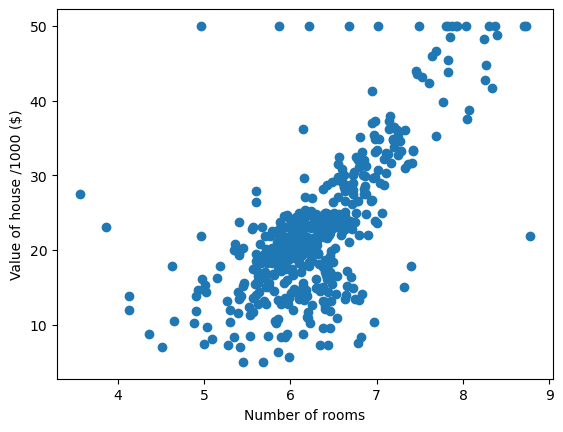

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

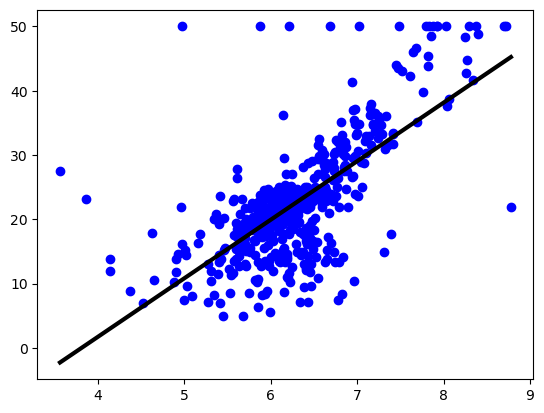

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# Fit the regressor to the data
reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test)

0.711226005748496

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

reg = LinearRegression()

# cv defines the number of folds
# the score reported is R^2
cv_results = cross_val_score(reg, X, y, cv=5)

print(cv_results) # [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
np.mean(cv_results) # 0.3532759243958772

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


0.3532759243958772

In [17]:
# Ridge regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Normalize = True will ensure all values are between 0 and 1
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test) # 0.6996938275127313

0.6996938275127313

In [18]:
# Lasso regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Normalize = True will ensure all values are between 0 and 1
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = ridge.predict(X_test)
lasso.score(X_test, y_test) # 0.5950229535328551

0.5950229535328551

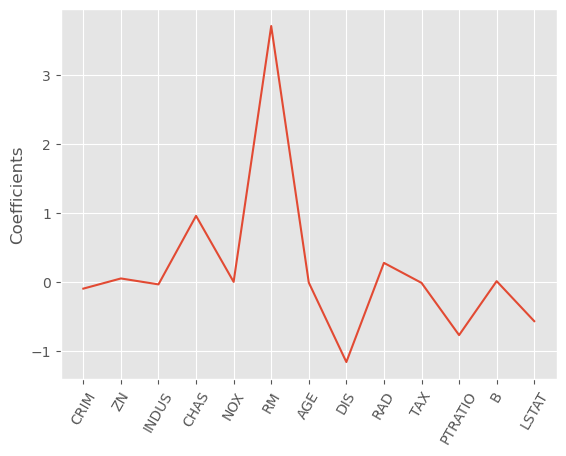

In [38]:
# Shrinking less important features 
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

plt.style.use('ggplot')

boston = load_boston()

X = boston.data
y = boston.target

lasso = Lasso(alpha=0.1)

# Extract coef_
lasso_coef = lasso.fit(X, y).coef_

_ = plt.plot(range(len(boston.feature_names)), lasso_coef)
_ = plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()